In [1]:
### Analyze the amount
import pandas as pd
Clean_SIREN_MCC_APPLICATION=pd.read_csv("Clean_SIREN_MCC_APPLICATION_Dropped.csv")


C:\Users\Kalairani VIGNESH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def convert_to_EUR(args):  # placeholder for your fancy conversion function
    amount = float(args[0])
    currency = str(int(args[1]))
    rates = {'36': 0.65, '124': 0.67, '356': 0.012, '392': 0.0077, '414': 2.77, '484': 0.04, '702': 0.62, '756': 0.9, 
             '784': 0.23, '826': 1.16, '840': 0.84, '978': 1}
    return rates[currency] * amount


In [4]:
Clean_SIREN_MCC_APPLICATION["currency_code"].value_counts()

978    6852547
756        651
840        176
826         21
784         15
392          4
484          3
36           3
124          2
702          1
414          1
356          1
Name: currency_code, dtype: int64

In [5]:
 rates = {'36': 0.65, '124': 0.67, '356': 0.012, '392': 0.0077, '414': 2.77, '484': 0.04, '702': 0.62, '756': 0.9, 
             '784': 0.23, '826': 1.16, '840': 0.84, '978': 1}
rates["36"]

0.65

In [6]:
Clean_SIREN_MCC_APPLICATION["AmountInEUR"] = Clean_SIREN_MCC_APPLICATION[["amount","currency_code"]].apply(convert_to_EUR,axis=1)

In [7]:
 Clean_SIREN_MCC_APPLICATION[["amount","AmountInEUR"]]

,amount,AmountInEUR
0,7.5,7.5
1,25.4,25.4
2,44.8,44.8
3,46.4,46.4
4,35.4,35.4
...,...,...
6853420,224.0,224.0
6853421,100.0,100.0
6853422,598.0,598.0
6853423,1.0,1.0


In [8]:
str(int(978.0))

'978'

In [9]:
Clean_SIREN_MCC_APPLICATION['type'].value_counts()

DEBIT             6572032
TNA                279023
CREDIT               1925
DEBIT_REVERSAL        445
Name: type, dtype: int64

In [3]:
Clean_SIREN_MCC_APPLICATION=Clean_SIREN_MCC_APPLICATION.loc[Clean_SIREN_MCC_APPLICATION.type== 'DEBIT',:]

In [11]:
Kmeans_EUR_Amount = Clean_SIREN_MCC_APPLICATION[["AmountInEUR"]]

In [12]:
Kmeans_EUR_Amount

,AmountInEUR
0,7.5
1,25.4
2,44.8
3,46.4
4,35.4
...,...
6853418,523.0
6853419,41.0
6853420,224.0
6853421,100.0


In [15]:
sse = []
silhouette_coefficients = []
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
} 

print("kmeans_kwargs::",kmeans_kwargs)

kmeans_kwargs:: {'init': 'random', 'n_init': 10, 'max_iter': 300, 'random_state': 42}


In [14]:
from sklearn.cluster import KMeans
import numpy as np

In [17]:
sse=[]
#silhouette_coefficients = []
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    print("k:",k)
    kmeans_preludd = KMeans(n_clusters=k, **kmeans_kwargs)
    print("kmeans_preludd:",kmeans_preludd)
    kmeans_preludd.fit(Kmeans_EUR_Amount)
    print("After Fit::",kmeans_preludd)
    sse.append(kmeans_preludd.inertia_)
    print("sse::",sse)
    #silhouette_coefficients.append(silhouette_score(Kmeans_EUR_Amount, kmeans_preludd.labels_, metric = 'euclidean'))
    #print("silhouette_coefficients",silhouette_coefficients)
    

   

k: 2
kmeans_preludd: KMeans(init='random', n_clusters=2, random_state=42)
After Fit:: KMeans(init='random', n_clusters=2, random_state=42)
sse:: [151757731397.33438]
silhouette_coefficients []
k: 3
kmeans_preludd: KMeans(init='random', n_clusters=3, random_state=42)
After Fit:: KMeans(init='random', n_clusters=3, random_state=42)
sse:: [151757731397.33438, 109145074383.24841]
silhouette_coefficients []
k: 4
kmeans_preludd: KMeans(init='random', n_clusters=4, random_state=42)
After Fit:: KMeans(init='random', n_clusters=4, random_state=42)
sse:: [151757731397.33438, 109145074383.24841, 63946555438.739784]
silhouette_coefficients []
k: 5
kmeans_preludd: KMeans(init='random', n_clusters=5, random_state=42)
After Fit:: KMeans(init='random', n_clusters=5, random_state=42)
sse:: [151757731397.33438, 109145074383.24841, 63946555438.739784, 47303776742.9097]
silhouette_coefficients []
k: 6
kmeans_preludd: KMeans(init='random', n_clusters=6, random_state=42)
After Fit:: KMeans(init='random', n_

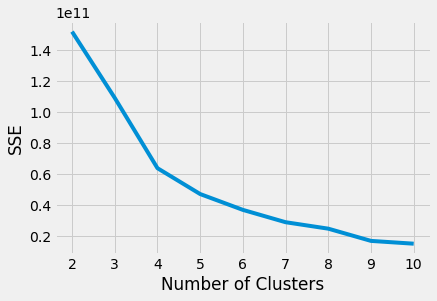

In [18]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [79]:
from kneed import KneeLocator
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )

In [80]:
kl.elbow

4

In [21]:
kmeans_preludd = KMeans(n_clusters=6, **kmeans_kwargs)
kmeans_preludd.fit(Kmeans_EUR_Amount)


KMeans(init='random', n_clusters=6, random_state=42)

In [22]:
prediction = kmeans_preludd.predict(Kmeans_EUR_Amount)

In [23]:
Kmeans_EUR_Amount["ClusterGroup"] = prediction

<ipython-input-23-20bd0d097152>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kmeans_EUR_Amount["ClusterGroup"] = prediction


In [24]:
np.bincount(prediction)

array([   1751,   18450,      11, 6370948,     207,  180665], dtype=int64)

In [25]:
Kmeans_EUR_Amount[Kmeans_EUR_Amount["ClusterGroup"]==3]

,AmountInEUR,ClusterGroup
0,7.5,3
1,25.4,3
2,44.8,3
3,46.4,3
4,35.4,3
...,...,...
6853412,100.0,3
6853414,44.0,3
6853415,82.0,3
6853419,41.0,3


In [26]:
Kmeans_EUR_Amount.to_csv("AmountCluster_Group6.csv")

In [27]:
Clean_SIREN_MCC_APPLICATION["AmountCluster"] = prediction

In [29]:
Clean_SIREN_MCC_APPLICATION[["AmountInEUR","application","mcc","serial_number","legal_infos_head_office_registration_number","legal_name","AmountCluster"]].to_csv("AmountCluster_Group6.csv")

In [8]:
Clean_SIREN_MCC_APPLICATION[Clean_SIREN_MCC_APPLICATION["amount"] == 300000]["type"]

5870475    TNA
Name: type, dtype: object

In [10]:
Clean_SIREN_MCC_APPLICATION[Clean_SIREN_MCC_APPLICATION["type"] == "Credit"]["type"]

Series([], Name: type, dtype: object)

In [2]:
### March 15
import pandas as pd
Grouped=pd.read_csv("AmountCluster_Group6.csv")


In [3]:
Grouped

,Unnamed: 0,AmountInEUR,application,mcc,serial_number,legal_infos_head_office_registration_number,legal_name,AmountCluster
0,0,7.5,CBEMV,7991,401153046,840058762.0,BLOCK'OUT,3
1,1,25.4,CBEMV,7991,401153046,840058762.0,BLOCK'OUT,3
2,2,44.8,CBEMV,7991,401153046,840058762.0,BLOCK'OUT,3
3,3,46.4,CBEMV,7991,401153046,840058762.0,BLOCK'OUT,3
4,4,35.4,CBEMV,7991,401153046,840058762.0,BLOCK'OUT,3
...,...,...,...,...,...,...,...,...
6572027,6853418,523.0,CBEMV,7941,CT81206537,479782690.0,SAVA.SEM,5
6572028,6853419,41.0,CBEMV,7941,CT81206537,479782690.0,SAVA.SEM,3
6572029,6853420,224.0,CBEMV,7941,CT81206537,479782690.0,SAVA.SEM,5
6572030,6853421,100.0,CBEMV,7941,CT81206537,479782690.0,SAVA.SEM,3


In [6]:
Clean_SIREN_MCC_APPLICATION.columns

Index(['Unnamed: 0', 'created_at', 'serial_number', 'manufacturer',
       'contract_number', 'contract_rank', 'bank_code', 'registration_number',
       'legal_name', 'application', 'currency_code', 'mcc', 'credits_number',
       'debits_number', 'debits_reversal_number', 'non_completed_number',
       'credits_amount', 'debits_amount', 'debits_reversal_amount',
       'transaction_count', 'local_transaction_datetime.1', 'amount',
       'authorization_number', 'type', 'legal_infos_registration_number',
       'legal_infos_head_office_registration_number',
       'legal_infos_normalized_address_l7', 'legal_infos_postal_code',
       'legal_infos_city_name', 'legal_infos_company_long_name',
       'legal_infos_acronym', 'edited_description', 'combined_description',
       'usda_description', 'irs_description', 'irs_reportable'],
      dtype='object')

In [8]:
Grouped['local_transaction_datetime']=Clean_SIREN_MCC_APPLICATION['local_transaction_datetime.1']

In [13]:
Grouped['mcc_description']=Clean_SIREN_MCC_APPLICATION['combined_description']

In [16]:
Grouped['legal_infos_city_name']=Clean_SIREN_MCC_APPLICATION['legal_infos_city_name']

In [14]:
Grouped=Grouped.drop(["Unnamed: 0"],axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [17]:
Grouped.to_csv("AmountCluster_Group6_Date.csv")

In [4]:
Grouped.legal_infos_head_office_registration_number.nunique()

11769

In [5]:
Grouped.application.nunique()

15

In [6]:
Grouped.mcc.nunique()

186

In [7]:
Grouped.serial_number.nunique()

16449